# Business Statistics Project: Axis Health Insurance

## Context

Leveraging customer information is of paramount importance for most businesses. In the case of an insurance company, the attributes of customers can be crucial in making business decisions. Hence, knowing to explore and generate value out of such data can be an invaluable skill to have.

Suppose you are hired as a Data Scientist in an Insurance company. The company wants to have a detailed understanding of the customer base for one of its Insurance Policy 'MediClaim'. The idea is to generate insights about the customers and answer a few key questions with statistical evidence, by using the past dataset. The dataset 'AxisInsurance' contains customers' details like age, sex, charges, etc. Perform the statistical analysis to answer the following questions using the collected data.

## Objective

Statistical Analysis of Business Data. Explore the dataset and extract insights from the data.
You are expected to do the following:

1. Explore the dataset and extract insights using Exploratory Data Analysis.
2. Prove(or disprove) that the medical claims made by the people who smoke are greater than those who don't?
3. Prove (or disprove) with statistical evidence that the BMI of females is different from that of males.
4. Does the smoking habit of customers depend on their region? [Hint: Create a contingency table using the pandas.crosstab() function]
5. Is the mean BMI of women with no children, one child, and two children the same? Explain your answer with statistical evidence.

*Consider a significance level of 0.05 for all tests.

## Data Dictionary

1. Age - This is an integer indicating the age of the primary beneficiary (excluding those above 64 years, since they are generally covered by the government).
2. Sex - This is the policy holder's gender, either male or female.
3. BMI - This is the body mass index (BMI), which provides a sense of how over or underweight a person is relative to their height. BMI is equal to weight (in kilograms) divided by height (in meters) squared. An ideal BMI is within the range of 18.5 to 24.9.
4. Children - This is an integer indicating the number of children/dependents covered by the insurance plan.
5. Smoker - This is yes or no depending on whether the insured regularly smokes tobacco.
6. Region - This is the beneficiary's place of residence in the U.S., divided into four geographic regions - northeast, southeast, southwest, or northwest.
7. Charges​ - Individual medical costs billed to health insurance

## Import all the necessary libraries

In [1]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sns

## Exploratory Data Analysis

My process consists of the following steps:
1.	Importing Data
2.	Variable Identification
3.  Variable Transformation/Feature Creation
4.  Missing value detection
5.	Univariate Analysis
6.	Bivariate Analysis

### Reading the data into a DataFrame

In [2]:
df = pd.read_csv('AxisInsurance.csv')

### Observe the dataset

In [3]:
df.head()

,age,sex,bmi,children,smoker,region,charges
0,21,female,16.000,1,no,northeast,3167.45585
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [4]:
df.tail()

,age,sex,bmi,children,smoker,region,charges
1333,50,male,30.97,3,no,northwest,10600.54830
1334,52,female,46.75,5,no,southeast,12592.53450
1335,54,female,47.41,0,yes,southeast,63770.42801
1336,37,female,47.60,2,yes,southwest,46113.51100
1337,46,female,48.07,2,no,northeast,9432.92530


### Understand the shape of the dataset

In [5]:
df.shape

(1338, 7)

* The dataset has 1338 rows and 7 columns.

### Check the data types of the columns for the dataset

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


* There are total 1338 non-null observations in each of the columns.

* There are 7 columns named **'age', 'sex', 'bmi', 'children', 'smoker', 'region', and 'charges'** whose data types are **int64, object, float64, int64, object, object, anf float64**, respectively.

In [7]:
#identify variables which should be converted from object to category
for col in df.columns[df.dtypes=='object']:
    print(df[col].unique(),df[col].nunique())

['female' 'male'] 2
['no' 'yes'] 2
['northeast' 'southeast' 'northwest' 'southwest'] 4


- The column *sex* has 2 unique values, *smoker* has 2, and *region* has 4.
- All columns with object dtype object should be converted to category, which will reduce the space required to store the DataFrame and help with analysis later on.

In [8]:
#convert all columns with dtype object into category
for col in df.columns[df.dtypes=='object']:
    df[col] = df[col].astype('category')

In [9]:
#confirm conversion and memory savings
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype   
---  ------    --------------  -----   
 0   age       1338 non-null   int64   
 1   sex       1338 non-null   category
 2   bmi       1338 non-null   float64 
 3   children  1338 non-null   int64   
 4   smoker    1338 non-null   category
 5   region    1338 non-null   category
 6   charges   1338 non-null   float64 
dtypes: category(3), float64(2), int64(2)
memory usage: 46.2 KB


### Check for missing values

In [10]:
df.isna().sum()   #null value check

age         0
sex         0
bmi         0
children    0
smoker      0
region      0
charges     0
dtype: int64

* There are no missing values in any of the column

### Univariate Analysis

In [11]:
# function to plot a boxplot and a histogram along the same scale

def histogram_boxplot(data, feature, figsize=(16, 6), kde=False, bins=None):
    """
    Combines boxplot and histogram

    data: dataframe
    feature: dataframe column
    figsize: size of figure (default (16,6))
    kde: whether to show the density curve (default False)
    bins: number of bins for histogram (default None)
    """
    f2, (ax_box2, ax_hist2) = plt.subplots(
        nrows=2,  # Number of rows of the subplot grid= 2
        sharex=True,  # x-axis will be shared among all subplots
        gridspec_kw={"height_ratios": (0.25, 0.75)},
        figsize=figsize,
    )  # creating the 2 subplots
    sns.boxplot(
        data=data, x=feature, ax=ax_box2, showmeans=True, color="aqua"
    )  # boxplot will be created and a star will indicate the mean value of the column
    sns.histplot(
        data=data, x=feature, kde=kde, ax=ax_hist2, bins=bins, palette="winter"
    ) if bins else sns.histplot(
        data=data, x=feature, kde=kde, ax=ax_hist2
    )  # For histogram
    ax_hist2.axvline(
        data[feature].mean(), color="green", linestyle="--"
    )  # Add mean to the histogram
    ax_hist2.axvline(
        data[feature].median(), color="black", linestyle="-"
    )  # Add median to the histogram

In [12]:
# function to create labeled barplots


def labeled_barplot(data, feature, perc=False, n=None):
    """
    Barplot with percentage at the top

    data: dataframe
    feature: dataframe column
    perc: whether to display percentages instead of count (default is False)
    n: displays the top n category levels (default is None, i.e., display all levels)
    """

    total = len(data[feature])  # length of the column
    count = data[feature].nunique()
    if n is None:
        plt.figure(figsize=(count + 1, 5))
    else:
        plt.figure(figsize=(n + 1, 5))

    plt.xticks(rotation=90, fontsize=10)
    ax = sns.countplot(
        data=data,
        x=feature,
        palette='viridis',
        order=data[feature].value_counts().index[:n].sort_values(),
    )

    for p in ax.patches:
        if perc == True:
            label = "{:.1f}%".format(
                100 * p.get_height() / total
            )  # percentage of each class of the category
        else:
            label = p.get_height()  # count of each level of the category

        x = p.get_x() + p.get_width() / 2  # width of the plot
        y = p.get_height()  # height of the plot

        ax.annotate(
            label,
            (x, y),
            ha="center",
            va="center",
            size=12,
            xytext=(0, 5),
            textcoords="offset points"
        )  # annotate the percentage

    plt.show()  # show the plot

In [13]:
#format numeric data for easier readability
pd.set_option(
    "display.float_format", lambda x: "%.2f" % x
)  # to display numbers rounded off to 2 decimal places

### Float64 variables

In [14]:
df.describe(include = ['float64']).T

,count,mean,std,min,25%,50%,75%,max
bmi,1338.00,30.68,6.15,14.00,26.32,30.40,34.70,53.13
charges,1338.00,13270.42,12110.01,1121.87,4740.29,9382.03,16639.91,63770.43


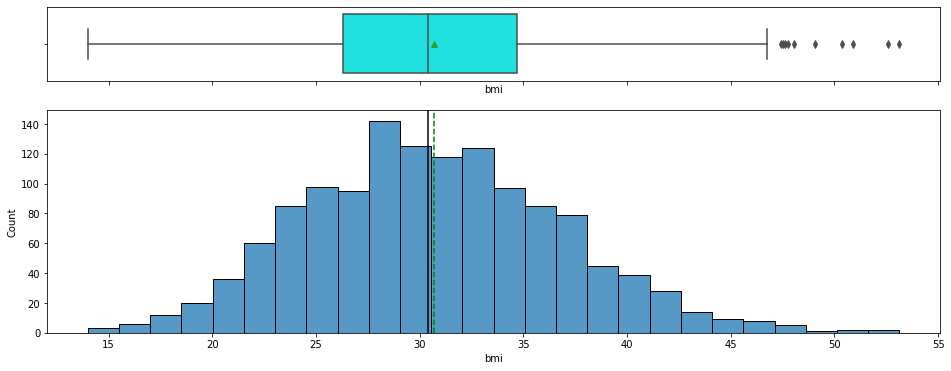

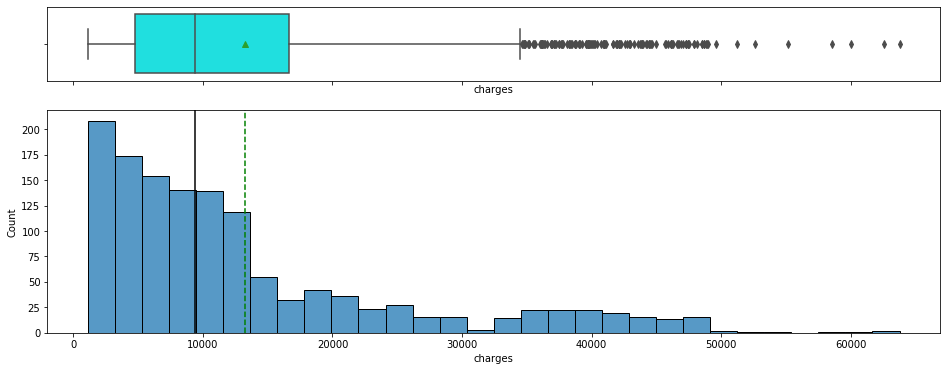

In [15]:
#provide boxplots and histograms of float64 variables
for col in df.columns[df.dtypes == 'float64']:
    histogram_boxplot(df, col)

* The mean, median, and maximum BMI is 30.6, 30.4, and 53.1, respectively.
* There are a few outliers in the BMI distribution, indicating that there are a select very overweight people within the dataset.
* The mean, median, and maximum insurance charges is 13270 dollars, 9382 dollars, and 63770 dollars, respectively. These numbers indicate that the distribution of charges is right skewed.
* The distribution of charges above confirms this skew. Clearly, a select group of people cost considerably more for insurance than others, with the most expensive people costing the company over 6x more than the median person.

### Int64 variables

In [16]:
df.describe(include = ['int64']).T

,count,mean,std,min,25%,50%,75%,max
age,1338.00,39.21,14.05,18.00,27.00,39.00,51.00,64.00
children,1338.00,1.09,1.21,0.00,0.00,1.00,2.00,5.00


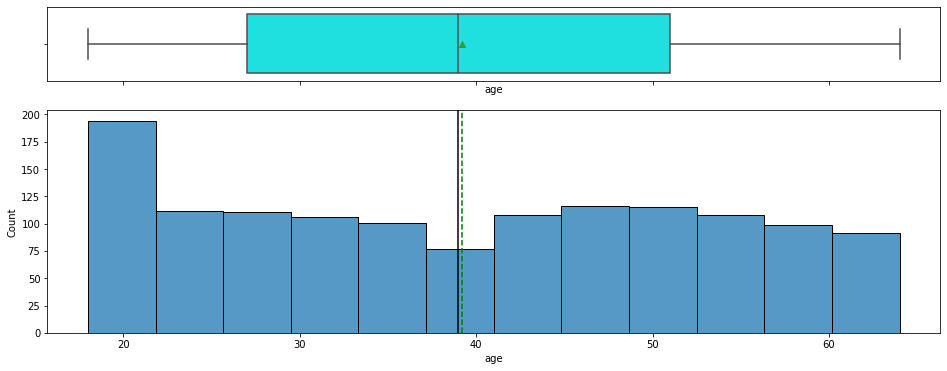

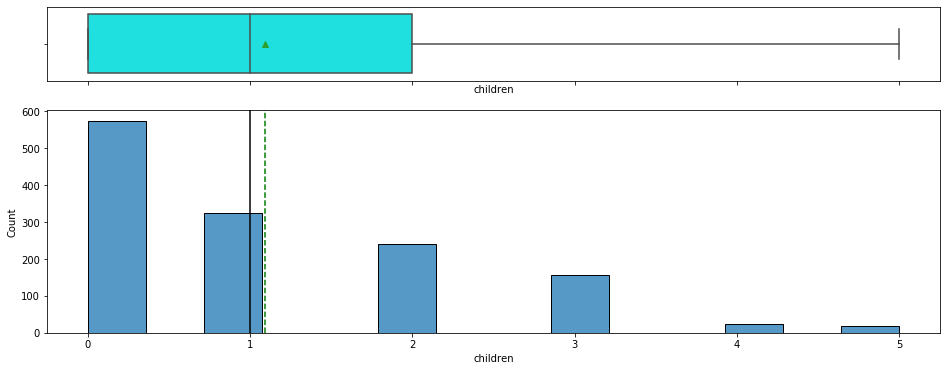

In [17]:
#provide boxplots and histograms of continous variables
for col in df.columns[df.dtypes == 'int64']:
    histogram_boxplot(df, col)

* The mean, median, and maximum age is 39, 39, and 64, respectively.
* The distribution shows that at least a quarter of the people in the dataset are younger than 27 and that the remainder of the people are more evenly distributed across the older ages.
* The mean, median, and maximum number of children each person has is 1, 1, and 5, respectively.
* As the number of children a person has increases, there are incrementally fewer people in his or her group.

### Categorical variables

In [18]:
df.describe(include = ['category']).T

,count,unique,top,freq
sex,1338,2,male,676
smoker,1338,2,no,1064
region,1338,4,southeast,364


In [19]:
#loop through all categorical variables and return counts of each
num_to_display = 10
print('\n')
for colname in df.dtypes[df.dtypes == 'category'].index:
    val_counts = df[colname].value_counts()
    print(val_counts[:num_to_display])
    if len(val_counts) > num_to_display:
        print(f'Only displaying first {num_to_display} of {len(val_counts)} values.')
    print('\n')



male      676
female    662
Name: sex, dtype: int64


no     1064
yes     274
Name: smoker, dtype: int64


southeast    364
southwest    325
northwest    325
northeast    324
Name: region, dtype: int64




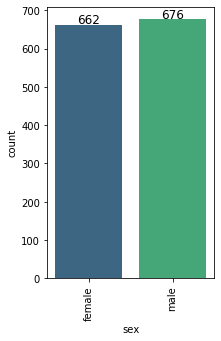

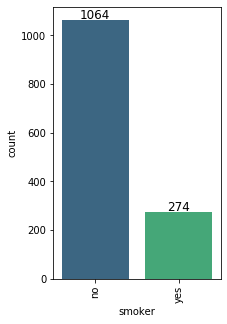

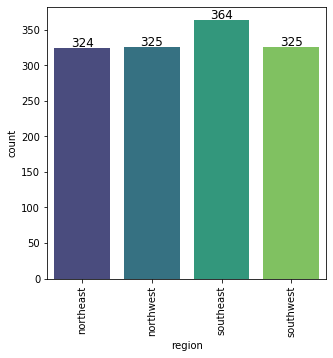

In [20]:
#provide labeled barplots of categorical variables
for col in df.columns[df.dtypes == 'category']:
    labeled_barplot(df, col)

* Of the 1338 people observed in the dataset:
    * 676 are male and 662 are female
    * 274 are smokers
    * 364 are from the souteast, 325 are from the soutwest, 325 are from the northwest, and 324 are from the northeast
    * The above numbers indicate that the dataset is not overly biased towards people of one sex or region

### Bivariate Analysis

#### Correlation Heat Map

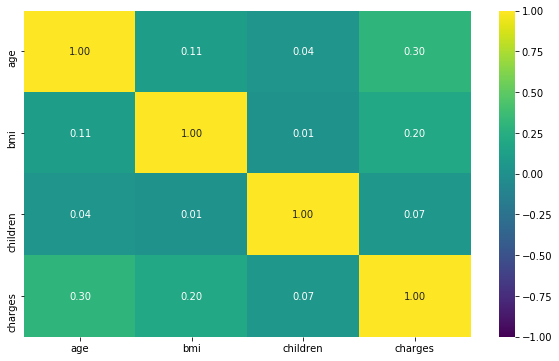

In [21]:
numeric_columns = df.select_dtypes(include=np.number).columns.tolist()

# correlation heatmap
plt.figure(figsize=(10, 6))
sns.heatmap(
    df[numeric_columns].corr(),
    annot=True,
    vmin=-1,
    vmax=1,
    fmt=".2f",
    cmap='viridis',
)
plt.show()

**Observations**
* Age and BMI show positive correlations with charges, indicating that policies for older and heavier people cost the company more.
* Age and BMI show a small positive correlation with each other, indicating that as people age they generally gain some weight.

#### Age vs. Charges

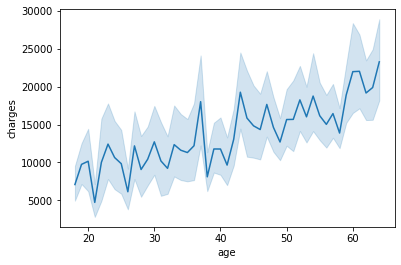

In [22]:
sns.lineplot(data = df, x = 'age', y='charges')
plt.show()

**Observations**
* The line plot above indicates that as people age their policies cost the company more.

#### Smoker status vs. charges

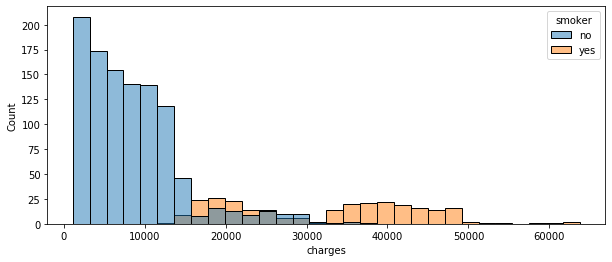

In [23]:
plt.figure(figsize=(10,4))
sns.histplot(data=df, x='charges', hue='smoker')
plt.show()

**Observations**
* The distribution above shows that the insurance policies for smokers dominate the higher costs for the company in the dataset.

#### Sex vs. charges

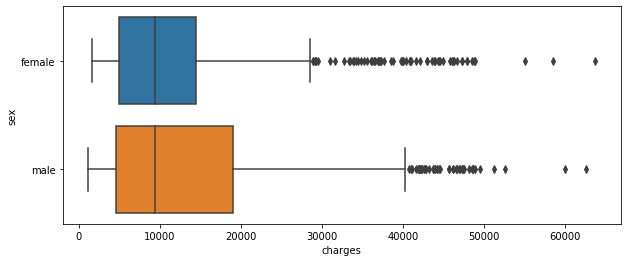

In [24]:
plt.figure(figsize=(10,4))
sns.boxplot(data = df, x = 'charges', y = 'sex')
plt.show()

**Observations**
* The distribution of charges from men appears more right skewed than that for women

## Prove (or disprove) that the medical claims made by the people who smoke are greater than those who don't

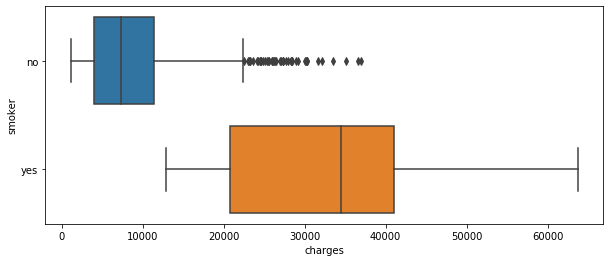

In [25]:
plt.figure(figsize=(10,4))
sns.boxplot(data = df, x = 'charges', y = 'smoker')
plt.show()

#### Observations
* As the boxplots above show, smokers appear to cost a significant amount more than nonsmokers. 
* So much so, that the mean amount of claims the company pays to a smoker would be an outlier within the distribution for non-smokers.

#### Null and alternate hypotheses

$H_0:$ The mean amount of medical claims made by people who smoke is not greater than non-smokers.

$H_a:$ The mean amount of medical claims made by people who smoke is greater than non-smokers.

Let $\mu_1$ and $\mu_2$ be the mean medical claims made by smokers and nonsmokers respectively.

Mathematically, the above formulated hypotheses can be written as:

$H_0: \mu_1 = \mu_2$

$H_a: \mu_1 > \mu_2$

#### Select Appropriate test

This is a one-tailed test concerning two population means from two independent populations. As the population standard deviations are unknown, the two sample independent t-test will be the appropriate test for this problem.

#### Decide the significance level

As given in the problem statement, we select α = 0.05.

#### Collect and prepare data

In [26]:
claim_smoke = df[df['smoker'] == 'yes']['charges']
claim_non = df[df['smoker'] == 'no']['charges']

In [27]:
print('The sample standard deviation of the time spent on the new page is:', round(claim_smoke.std(),2))
print('The sample standard deviation of the time spent on the new page is:', round(claim_non.std(),2))

The sample standard deviation of the time spent on the new page is: 11541.55
The sample standard deviation of the time spent on the new page is: 5993.78


As the sample standard deviations are different, the population standard deviations may be assumed to be different.

#### Calculate the p-value

In [28]:
# import the required function
from scipy.stats import ttest_ind
# find the p-value
test_stat, p_value = ttest_ind(claim_smoke, claim_non, equal_var = False, alternative = 'greater')
print('The p-value is', p_value)

The p-value is 2.94473222335849e-103


#### Compare the p-value with $\alpha$

In [29]:
# print the conclusion based on p-value
if p_value < 0.05:
    print(f'As the p-value {p_value} is less than the level of significance, we reject the null hypothesis.')
else:
    print(f'As the p-value {p_value} is greater than the level of significance, we fail to reject the null hypothesis.')

As the p-value 2.94473222335849e-103 is less than the level of significance, we reject the null hypothesis.


#### Draw inference

Since the p-value is less than the 5% significance level, we reject the null hypothesis. Hence, we have enough statistical evidence to conclude that the mean amount of claims made by smokers is greater than those made by non-smokers.

## Prove (or disprove) with statistical evidence that the BMI of females is different from that of males

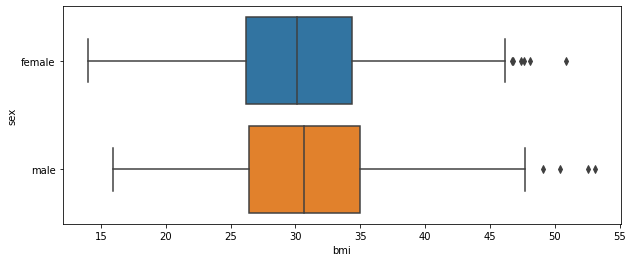

In [30]:
plt.figure(figsize=(10,4))
sns.boxplot(data = df, x = 'bmi', y = 'sex')
plt.show()

#### Observations
* As the boxplots above show, the mean, IQR, range, and outliers of male BMIs appear higher than those for females. 

#### Null and alternate hypotheses

$H_0:$ The mean BMI for males is equal to the mean BMI for females.

$H_a:$ The mean BMI for males is different than the mean BMI for females.

Let $\mu_1$ and $\mu_2$ be the mean BMI for males and females respectively.

Mathematically, the above formulated hypotheses can be written as:

>$H_0:\mu_1=\mu_2$

>$H_a:\mu_1\neq\mu_2$


#### Select Appropriate test

This is a two-tailed test concerning two population means from two independent populations. As the population standard deviations are unknown, the two sample independent t-test will be the appropriate test for this problem.

#### Decide the significance level

As given in the problem statement, we select α = 0.05.

#### Collect and prepare data

In [31]:
bmi_male = df[df['sex'] == 'male']['bmi']
bmi_female = df[df['sex'] == 'female']['bmi']

In [32]:
print('The sample standard deviation of the time spent on the new page is:', round(bmi_male.std(),2))
print('The sample standard deviation of the time spent on the new page is:', round(bmi_female.std(),2))

The sample standard deviation of the time spent on the new page is: 6.14
The sample standard deviation of the time spent on the new page is: 6.14


As the sample standard deviations the same, the population standard deviations may be assumed to be the same.

#### Calculate the p-value

In [33]:
# import the required function
from scipy.stats import ttest_ind
# find the p-value
test_stat, p_value = ttest_ind(bmi_male, bmi_female, equal_var = True, alternative = 'two-sided')
print('The p-value is', p_value)

The p-value is 0.11728314042826014


#### Compare the p-value with $\alpha$

In [34]:
# print the conclusion based on p-value
if p_value < 0.05:
    print(f'As the p-value {p_value} is less than the level of significance, we reject the null hypothesis.')
else:
    print(f'As the p-value {p_value} is greater than the level of significance, we fail to reject the null hypothesis.')

As the p-value 0.11728314042826014 is greater than the level of significance, we fail to reject the null hypothesis.


#### Draw inference

Since the p-value is greater than the 5% significance level, we can not reject the null hypothesis. Hence, we do not have enough statistical evidence to conclude that the mean BMI for males is different than the mean BMI for females.

## Does the smoking habit of customers depend on their region?

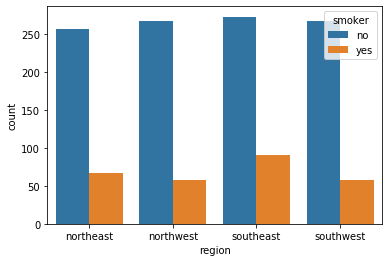

In [35]:
sns.countplot(data=df, x='region', hue='smoker')
plt.show()

#### Observations
* The southeast and the northeast  higher to have a higher number of smokers than the northwest and southwest.
* We need to check whether we have enough statistical evidence to conclude that smoking habit and region are independent or not.

#### Null and alternate hypotheses

$H_0:$ The smoking status is independent of the region the person is from.

$H_a:$ The smoking status is not independent of the region the person is from.

#### Select Appropriate test

This is a problem of Chi-square test of independence, concerning the two independent categorical variables, converted status and preferred language.

#### Decide the significance level

As given in the problem statement, we select α = 0.05.

#### Collect and prepare data

In [36]:
# create the contingency table showing the distribution of two categorical variables
contingency_table = pd.crosstab(df['smoker'], df['region'])
contingency_table

region,northeast,northwest,southeast,southwest
smoker,,,,
no,257,267,273,267
yes,67,58,91,58


#### Calculate the p-value

In [37]:
#import the required function
from scipy.stats import chi2_contingency
# use chi2_contingency() to find the p-value
chi2, p_value, dof, exp_freq = chi2_contingency(contingency_table)
# print the p-value
print('The p-value is', p_value)

The p-value is 0.06171954839170547


#### Compare the p-value with $\alpha$

In [38]:
# print the conclusion based on p-value
if p_value < 0.05:
    print(f'As the p-value {p_value} is less than the level of significance, we reject the null hypothesis.')
else:
    print(f'As the p-value {p_value} is greater than the level of significance, we fail to reject the null hypothesis.')

As the p-value 0.06171954839170547 is greater than the level of significance, we fail to reject the null hypothesis.


#### Draw inference

Since the p-value is less than the 5% significance level, we reject the null hypothesis. Hence, we have enough statistical evidence to conclude that the smoking habit of a person is dependent on the region they are from.

## Is the mean BMI of women with no children, one child, and two children the same?

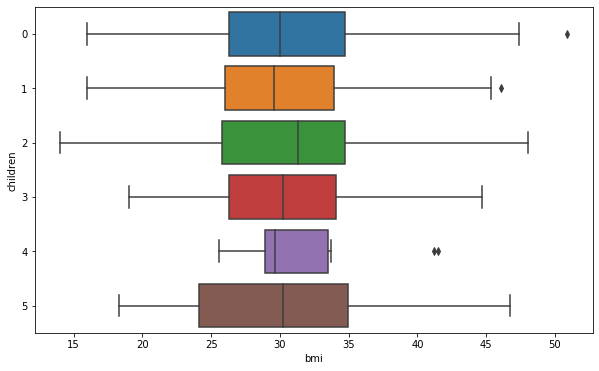

In [39]:
df['children'] = df['children'].astype('category')
plt.figure(figsize=(10,6))
sns.boxplot(data = df[df.sex=='female'], x = 'bmi', y='children')
plt.show()

#### Observations
* As the boxplots above show, the mean BMI of women with no children, one child, and two children appear close to each other, but not equal.

#### Null and alternate hypotheses

$H_0:$ The mean BMIs of women with no children, one child, and two children are equal.

$H_a:$ At least one of the mean BMIs of women with no children, one child, and two children is unequal.

#### Select Appropriate test

This is a problem, concerning three population means. One-way ANOVA could be the appropriate test here provided normality and equality of variance assumptions are verified.

* For testing of normality, Shapiro-Wilk’s test is applied to the response variable.

* For equality of variance, Levene test is applied to the response variable.

#### Shapiro-Wilk’s test

We will test the null hypothesis

>$H_0:$ BMI of women follows a normal distribution

against the alternative hypothesis

>$H_a:$ BMI of women does not follow a normal distribution

In [40]:
# Assumption 1: Normality
# import the required function
from scipy.stats import shapiro

# find the p-value
w, p_value = shapiro(bmi_female) 
print('The p-value is', p_value)

The p-value is 0.10211114585399628


Since p-value of the test is higher than the 5% significance level, we fail to reject the null hypothesis that the response follows the normal distribution.

#### Levene’s test

We will test the null hypothesis

>$H_0$: All the population variances are equal

against the alternative hypothesis

>$H_a$: At least one variance is different from the rest

In [41]:
df_male = df[df['sex'] == 'male']
df_female = df[df['sex'] == 'female']
#Assumption 2: Homogeneity of Variance
#import the required function
from scipy.stats import levene
statistic, p_value = levene(df_female[df_female['children']==0]['bmi'],
                           df_female[df_female['children']==1]['bmi'],
                           df_female[df_female['children']==2]['bmi'])
# find the p-value
print('The p-value is', p_value)

The p-value is 0.33762398820932993


Since the p-value is larger than the 5% significance level, we fail to reject the null hypothesis of homogeneity of variances.

#### Decide the significance level

As given in the problem statement, we select α = 0.05.

#### Collect and prepare data

In [42]:
bmi_0 = df_female[df_female['children']==0]['bmi']
bmi_1 = df_female[df_female['children']==1]['bmi']
bmi_2 = df_female[df_female['children']==2]['bmi']

#### Calculate the p-value

In [43]:
# import the required function
from scipy.stats import f_oneway
# find the p-value
test_stat, p_value = f_oneway(bmi_0, bmi_1, bmi_2)
# print the p-value
print('The p-value is', p_value)

The p-value is 0.7200129592186635


#### Compare the p-value with $\alpha$

In [44]:
# print the conclusion based on p-value
if p_value < 0.05:
    print(f'As the p-value {p_value} is less than the level of significance, we reject the null hypothesis.')
else:
    print(f'As the p-value {p_value} is greater than the level of significance, we fail to reject the null hypothesis.')

As the p-value 0.7200129592186635 is greater than the level of significance, we fail to reject the null hypothesis.


#### Draw inference

Since the p-value is greater than the 5% significance level, we fail to reject the null hypothesis. Hence, we do not have enough statistical evidence to conclude that the mean BMI of women with no children, one child, or two children differ to any meaningful degree.

## Conclusions

- Claims made by smokers are greater than claims made by nonsmokers and a person's smoking habit is not dependent on their region.

- The mean BMI of males is not different than the mean BMI of females. Nor is the mean BMI of women with or without children different.